In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def plot_flops_and_cache_misses(filename, title_prefix):
    # Read the data
    df = pd.read_csv(filename)
    
    # Strip spaces from column names
    df.columns = df.columns.str.strip()

    # Debugging: Print column names to verify
    print(f"Columns in {filename}:", df.columns)

    # Extract unique loop orders and matrix sizes
    loop_orders = df['Loop Order'].unique()
    matrix_sizes = sorted(df['Matrix Size'].unique())
    
    # Plot FLOPs
    plt.figure(figsize=(10, 6))
    for loop_order in loop_orders:
        subset = df[df['Loop Order'] == loop_order]
        plt.plot(subset['Matrix Size'], subset['PAPI_FP_OPS'], marker='o', label=loop_order)
    
    plt.xscale('log')
    plt.xlabel('Matrix Size')
    plt.ylabel('FLOPs')
    plt.title(f'{title_prefix} FLOPs vs Matrix Size')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{title_prefix}_flops_plot.png')
    plt.show()
    
    # Plot L1 Cache Misses
    plt.figure(figsize=(10, 6))
    for loop_order in loop_orders:
        subset = df[df['Loop Order'] == loop_order]
        plt.plot(subset['Matrix Size'], subset['Cache Misses'], marker='o', label=loop_order)
    
    plt.xscale('log')
    plt.xlabel('Matrix Size')
    plt.ylabel('L1 Cache Misses')
    plt.title(f'{title_prefix} L1 Cache Misses vs Matrix Size')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'{title_prefix}_cache_misses_plot.png')
    plt.show()



Columns in RM_results.txt: Index(['Loop Order', 'Matrix Size', 'PAPI_FP_OPS', 'Cache Misses'], dtype='object')


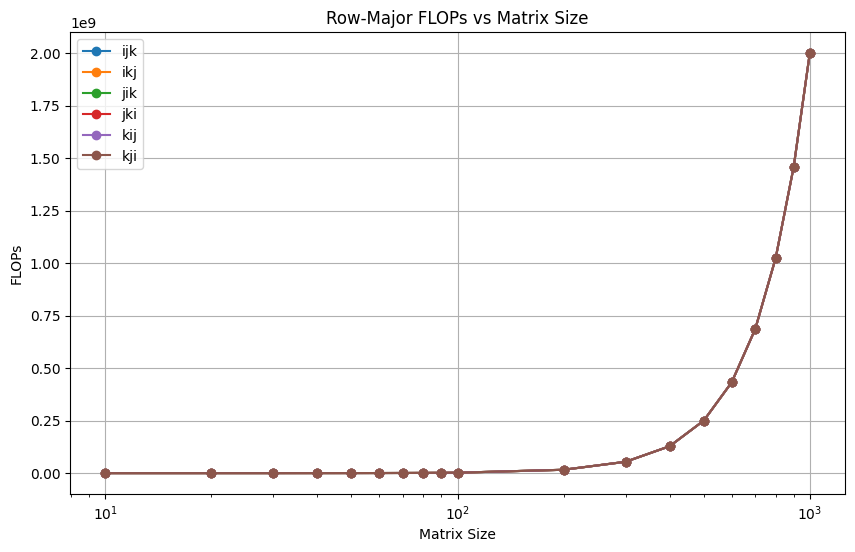

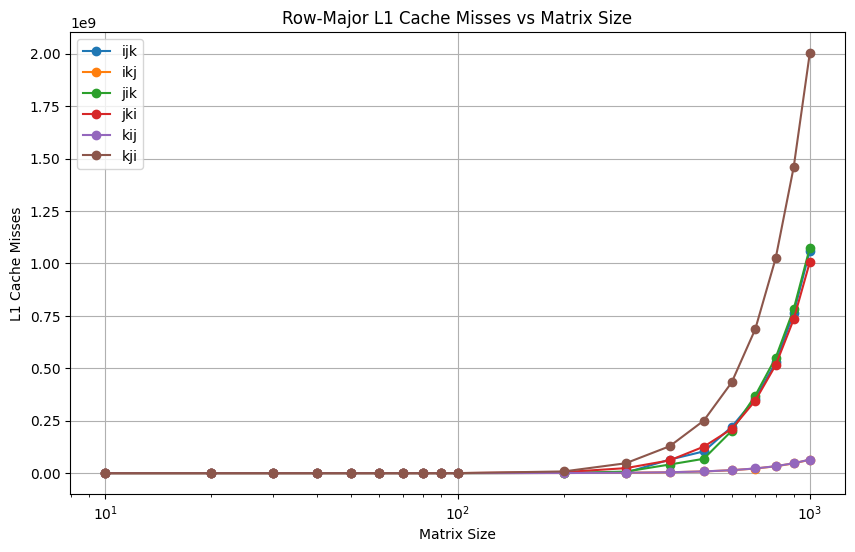

Columns in CM_results.txt: Index(['Loop Order', 'Matrix Size', 'PAPI_FP_OPS', 'Cache Misses'], dtype='object')


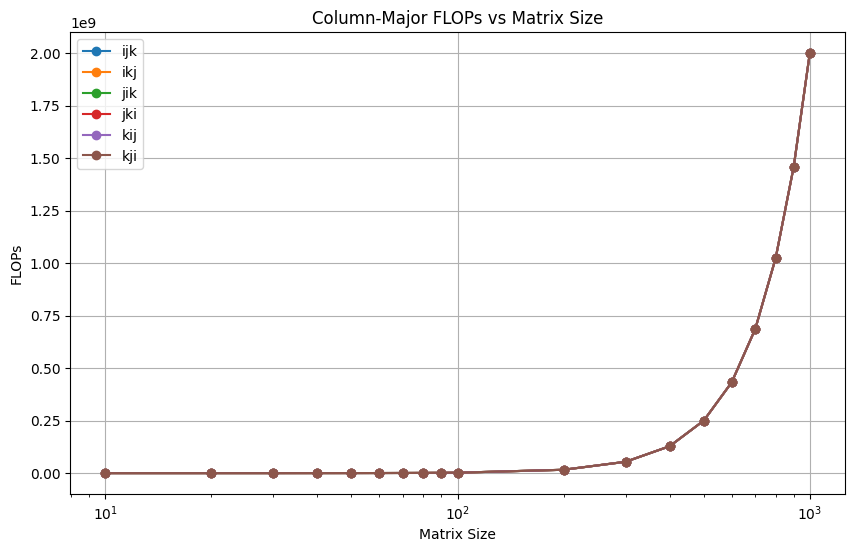

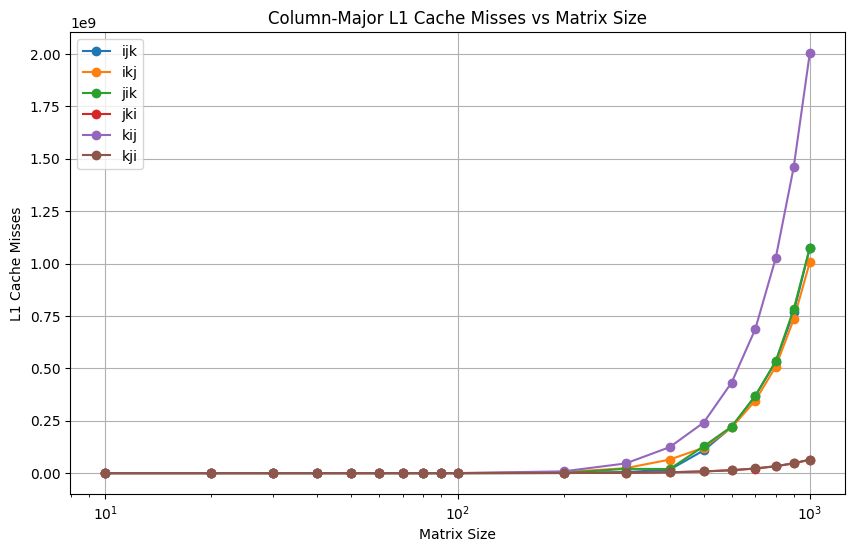

In [11]:
# Plot for Row-Major results
plot_flops_and_cache_misses('RM_results.txt', 'Row-Major')

# Plot for Column-Major results
plot_flops_and_cache_misses('CM_results.txt', 'Column-Major')
